# Create Split Data From \*.edf Directly

store data in `*.wav` file format (i.e. Int16)

```julia
struct EDFData
    
    # Header
    version::Int64                      # 8 ascii : version of this data format (0) 
    patient_info::String                # 80 ascii : local patient identification (mind item 3 of the additional EDF+ specs)
    record_info::String                 # 80 ascii : local recording identification (mind item 4 of the additional EDF+ specs)
    start_date::String                  # 8 ascii : startdate of recording (dd.mm.yy) (mind item 2 of the additional EDF+ specs)
    start_time::String                  # 8 ascii : starttime of recording (hh.mm.ss) 
    header_length::Int64                # 8 ascii : number of bytes in header record 
                                        # 44 ascii : reserved 
    recordnum::Int64                    # 8 ascii : number of data records (-1 if unknown, obey item 10 of the additional EDF+ specs) 
    sampleduration::Float32             # 8 ascii : duration of a data record, in seconds 
    nchannel::Int64                     # 4 ascii : number of signals (ns) in data record 
    channelLabels::Array{String, 1}     # ns * 16 ascii : ns * label (e.g. EEG Fpz-Cz or Body temp) (mind item 9 of the additional EDF+ specs)
    channelType::Array{String, 1}       # ns * 80 ascii : ns * transducer type (e.g. AgAgCl electrode) 
    physical_dim::Array{String, 1}      # ns * 8 ascii : ns * physical dimension (e.g. uV or degreeC) 
    physical_min::Array{Float32, 2}     # ns * 8 ascii : ns * physical minimum (e.g. -500 or 34) 
    physical_max::Array{Float32, 2}     # ns * 8 ascii : ns * physical maximum (e.g. 500 or 40) 
    digital_min::Array{Int16, 2}        # ns * 8 ascii : ns * digital minimum (e.g. -2048) 
    digital_max::Array{Int16, 2}        # ns * 8 ascii : ns * digital maximum (e.g. 2047) 
    prefiltering::Array{String, 1}      # ns * 80 ascii : ns * prefiltering (e.g. HP:0.1Hz LP:75Hz) 
    samples::Array{Int16, 1}            # ns * 8 ascii : ns * nr of samples in each data record 
    reserved_samples::Array{Int16, 1}   # ns * 32 ascii : ns * reserved
    
    # Data
    data::Array{Int16, 2}
    reserved_data::Array{Int16, 2}
end
```

In [2]:
include("../src/EEGAnalysis.jl")
using MAT
using Printf
using Plots
gr(fmt="png", size=(512,384))  # 8:6

Plots.GRBackend()

In [3]:
@time a = EEGAnalysis.EDFReader.readEDFFile("../../Data/Yunfan Shu/EEG/EDF/16_3.edf")

  1.437640 seconds (1.40 M allocations: 138.599 MiB, 8.62% gc time)


Main.EEGAnalysis.EDFReader.EDFData(0, "0 X 01-JAN-1985 No_Name", "Startdate 16-AUG-2018 X X NKC-EEG-1200A_V01.00", "16.08.18", "19.13.22", 31744, 619, 0.1245f0, 123, ["EEG A1-Ref", "EEG A2-Ref", "POL A3", "POL A4", "EEG C5-Ref", "EEG C6-Ref", "POL A7", "POL A8", "POL A9", "POL A10"  …  "POL EKG2", "POL EMGL1", "POL EMGL2", "POL EMGR1", "POL EMGR2", "POL BP1", "POL BP2", "POL BP3", "POL BP4", "EDF Annotations"], ["", "", "", "", "", "", "", "", "", ""  …  "", "", "", "", "", "", "", "", "", ""], ["uV", "uV", "uV", "uV", "uV", "uV", "uV", "uV", "uV", "uV"  …  "uV", "uV", "uV", "uV", "uV", "uV", "uV", "uV", "uV", ""], Float32[-222.265, -324.218, -341.699, -265.82, -106.054, -107.031, -125.878, -299.023, -258.691, -270.703  …  -1627.83, -848.437, -1029.19, -470.996, -659.667, -99.6093, -96.0937, -94.5312, -96.1914, -1.0], Float32[274.023, 360.059, 339.063, 215.43, 25.0977, 22.3633, 161.328, 452.441, 509.473, 417.578  …  1942.87, 896.191, 970.605, 1450.88, 758.398, 6.83594, 14.9414, 17.9688

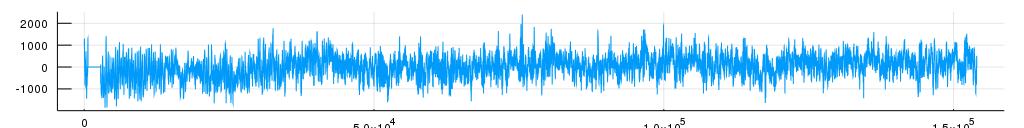

In [11]:
plot(a.data[:,99], size=(1024,128), legend=false)

In [9]:
1024/128

8.0

In [54]:
EEGAnalysis.EDFData

UndefVarError: UndefVarError: EDFData not defined

In [ ]:
function splitedf(sgchdir::String, edf::EEGAnalysis.EDFReader.EDFData)
    for Chidx = 0:size(edf.data, 2)-1
        sgdir = joinpath(sgchdir, Printf.@printf("ch%03d", 3))
        if !isdir(sgdir)
            mkdir(sgdir)
        end 
    end
end

In [25]:
ch2save = 99
matwrite("test.mat", Dict([
            "values" => a.data[:, ch2save],
            "physical_dim" => a.physical_dim[ch2save],
            "physical_max" => a.physical_max[ch2save],
            "physical_min" => a.physical_min[ch2save],
            "fs" => a.Fs,
            ]))

┌ Warning: Vector{UInt8}(s::String) will copy data in the future. To avoid copying, use `unsafe_wrap` or `codeunits` instead.
│   caller = close(::MAT.MAT_HDF5.MatlabHDF5File) at MAT_HDF5.jl:65
└ @ MAT.MAT_HDF5 /Users/yizhan/.julia/packages/MAT/Pn0pR/src/MAT_HDF5.jl:65


In [24]:
s = a.data |> sizeof
"$(s / 1024 / 1024) MB"

"206.50185585021973 MB"

In [31]:
size(a.data,1) / 2000

77.0655